In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

#caricamento file 
file_path = "california_housing_data.csv"
df = pd.read_csv(file_path)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [174]:
#df = df.drop(columns=['MedInc'])
#df = df.drop(columns=['Population'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [175]:
#rimozione outlier
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col].between(lower, upper), df[col], np.nan)

df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16312 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16312 non-null  float64
 1   HouseAge     16312 non-null  float64
 2   AveRooms     16312 non-null  float64
 3   AveBedrms    16312 non-null  float64
 4   Population   16312 non-null  float64
 5   AveOccup     16312 non-null  float64
 6   Latitude     16312 non-null  float64
 7   Longitude    16312 non-null  float64
 8   MedHouseVal  16312 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [176]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [178]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#normalizzazione variabile polinomiale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

**METRICHE DI REGRESSIONE LINEARE** <br>

- **MAE**: Mean Absolute Error, media assoluta tra valore predetto e valore attuale. È una misurazione delle tipiche discrepanze assolute tra i valori effettivi di un set di dati e i valori predetti.

- **MSE**: Mean Squared Error, media quadratica tra valore predetto e valore attuale. Viene utilizzato per valutare quanto bene funzionano i modelli predittivi.

- **R^2**: R-squared, quantifica la percentuale della variazione della variabile dipendente a cui le variabili indipendenti contribuiscono. Utile per valutare l'efficacia complessiva e il potere esplicativo di un modello di regressione, chiamato anche coefficiente di determinazione.

- **RMSE**: Root Mean Squared Error, radice della media quadratica tra valore predetto e valore attuale. Usata per misurare l'accuratezza o la bontà di un modello predittivo.

In [179]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

In [180]:
#Ridge
model_ridge = Ridge(alpha=0.001) 
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)


In [181]:
#Lasso
model_lasso = Lasso(alpha=0.001) 
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+02, tolerance: 1.027e+00
  model = cd_fast.enet_coordinate_descent(


In [182]:
#Elastic
model_elastic = ElasticNet(alpha=0.001)
model_elastic.fit(X_train_scaled, y_train)
y_pred_elastic = model_elastic.predict(X_test_scaled)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.316e+02, tolerance: 1.027e+00
  model = cd_fast.enet_coordinate_descent(


In [183]:
#metriche
mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"[Ridge Regr.] RMSE: {rmse_ridge:.4f} | R2: {r2_ridge:.4f}")

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_ridge)
print(f"[Lasso Regr.] RMSE: {rmse_lasso:.4f} | R2: {r2_lasso:.4f}")

rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"[Elast Regr.] RMSE: {rmse_elastic:.4f} | R2: {r2_elastic:.4f}")

improvement_ridge = (rmse - rmse_ridge) / rmse * 100
print(f"Miglioramento ridge su OLS: {improvement_ridge:.2f}% (Se positivo, ha ridotto l'errore)")

improvement_lasso = (rmse - rmse_lasso) / rmse * 100
print(f"Miglioramento lasso su OLS: {improvement_lasso:.2f}% (Se positivo, ha ridotto l'errore)")

improvement_elastic = (rmse - rmse_elastic) / rmse * 100
print(f"Miglioramento elastic su OLS: {improvement_elastic:.2f}% (Se positivo, ha ridotto l'errore)")

MAE: 0.378208964105038
MSE: 0.2647812929321126
R2: 0.6958533687856863
RMSE: 0.5145690361186851
[Ridge Regr.] RMSE: 0.5145 | R2: 0.6960
[Lasso Regr.] RMSE: 0.5268 | R2: 0.6960
[Elast Regr.] RMSE: 0.5261 | R2: 0.6821
Miglioramento ridge su OLS: 0.02% (Se positivo, ha ridotto l'errore)
Miglioramento lasso su OLS: -2.38% (Se positivo, ha ridotto l'errore)
Miglioramento elastic su OLS: -2.24% (Se positivo, ha ridotto l'errore)


**RISULTATI TEST** <br>

- Senza outliers, test_size=0.3, random_state=42, Ridge(alpha=2), Lasso(alpha=0.02), ElasticNet(alpha=2):
    - MAE: 0.378208964105038
    - SE: 0.2647812929321126
    - R2: 0.6958533687856863
    - RMSE: 0.5145690361186851
    - [Ridge Regr.] RMSE: 0.5239 | R2: 0.6847
    - [Lasso Regr.] RMSE: 0.5570 | R2: 0.6847
    - [Elast Regr.] RMSE: 0.9335 | R2: -0.0010
    - Miglioramento ridge su OLS: -1.82% (Se positivo, ha ridotto l'errore)
    - Miglioramento lasso su OLS: -8.24% (Se positivo, ha ridotto l'errore)
    - Miglioramento elastic su OLS: -81.41% (Se positivo, ha ridotto l'errore)

- Senza outliers, test_size=0.3, random_state=42, Ridge(alpha=10), Lasso(alpha=0.01), ElasticNet(alpha=0.01):
    - MAE: 0.378208964105038
    - MSE: 0.2647812929321126
    - R2: 0.6958533687856863
    - RMSE: 0.5145690361186851
    - [Ridge Regr.] RMSE: 0.5253 | R2: 0.6830
    - [Lasso Regr.] RMSE: 0.5489 | R2: 0.6830
    - [Elast Regr.] RMSE: 0.5419 | R2: 0.6627
    - Miglioramento ridge su OLS: -2.08% (Se positivo, ha ridotto l'errore)
    - Miglioramento lasso su OLS: -6.68% (Se positivo, ha ridotto l'errore)
    - Miglioramento elastic su OLS: -5.31% (Se positivo, ha ridotto l'errore) 

- Senza outliers, test_size=0.3, random_state=42, Ridge(alpha=0.001), Lasso(alpha=0.001), ElasticNet(alpha=0.001):
    - MAE: 0.378208964105038
    - MSE: 0.2647812929321126
    - R2: 0.6958533687856863
    - RMSE: 0.5145690361186851
    - [Ridge Regr.] RMSE: 0.5145 | R2: 0.6960
    - [Lasso Regr.] RMSE: 0.5268 | R2: 0.6960
    - [Elast Regr.] RMSE: 0.5261 | R2: 0.6821
    - Miglioramento ridge su OLS: 0.02% (Se positivo, ha ridotto l'errore)
    - Miglioramento lasso su OLS: -2.38% (Se positivo, ha ridotto l'errore)
    - Miglioramento elastic su OLS: -2.24% (Se positivo, ha ridotto l'errore)

**RISULTATI TEST (SENZA POLINOMIALE E OTTIMIZZAZIONE REGRESSION)** <br>

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=42), con StandardScaler:
    - MAE: 0.6713261610064607
    - MSE: 0.7714182051646131
    - R2: 0.4122707560918122
    - RMSE: 0.8783041643784989

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=42), senza StandardScaler:
    - MAE: 0.6713261610064636
    - MSE: 0.7714182051646145
    - R2: 0.4122707560918112
    - RMSE: 0.8783041643784996

- df = df.drop(columns=['MedInc']), (test_size=0.2, random_state=42), con StandardScaler: 
    - MAE: 0.670828262463704
    - MSE: 0.777956088019748
    - R2: 0.40632573422682083
    - RMSE: 0.8820181902998079
- df = df.drop(columns=['MedInc']), (test_size=0.2, random_state=42), senza StandardScaler: 
    - MAE: 0.6708282624637023
    - MSE: 0.777956088019748
    - R2: 0.40632573422682083
    - RMSE: 0.8820181902998079

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=41), con StandardScaler: 
    - MAE: 0.670828262463704
    - MSE: 0.777956088019748
    - R2: 0.40632573422682083
    - RMSE: 0.8820181902998079

- df = df.drop(columns=['MedInc']), (test_size=0.3, random_state=41), senza StandardScaler: 
    - MAE: 0.6888627942874281
    - MSE: 0.8138429030074396
    - R2: 0.38923885956437143
    - RMSE: 0.90213241988493

- (test_size=0.3, random_state=42), con StandardScaler:
    - MAE: 0.5272474538305952
    - MSE: 0.5305677824766754
    - R2: 0.5957702326061662
    - RMSE: 0.7284008391515453

- (test_size=0.3, random_state=42), senza StandardScaler:
    - MAE: 0.5272474538305947
    - MSE: 0.5305677824766752
    - R2: 0.5957702326061665
    - RMSE: 0.7284008391515452

- df = df.drop(columns=['MedInc']), df = df.drop(columns=['Population']), (test_size=0.3, random_state=42), senza StandardScaler:
    - MAE: 0.6714153988855555
    - MSE: 0.7715559328418239
    - R2: 0.4121658239252515
    - RMSE: 0.8783825663353206

- (test_size=0.3, random_state=42), con StandardScaler, senza outlier: 
    - MAE: 0.42361889744557485
    - MSE: 0.3102000375145813
    - R2: 0.64368216739238
    - RMSE: 0.5569560463039981


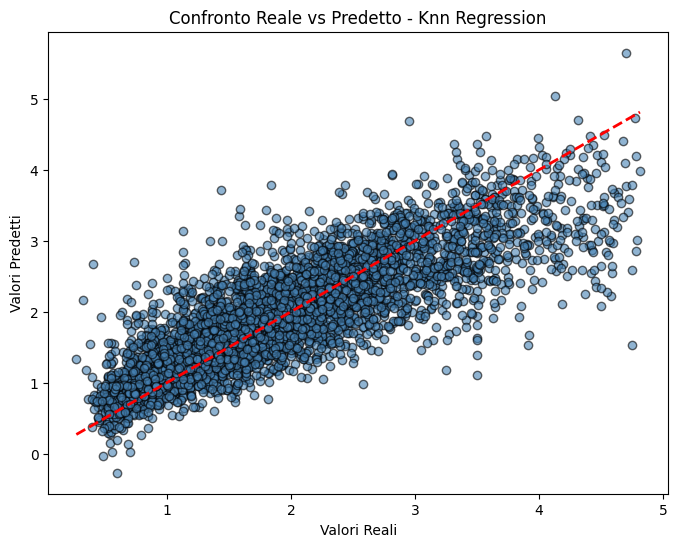

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color="steelblue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # linea ideale
plt.xlabel("Valori Reali")
plt.ylabel("Valori Predetti")
plt.title("Confronto Reale vs Predetto - Knn Regression")
plt.show()

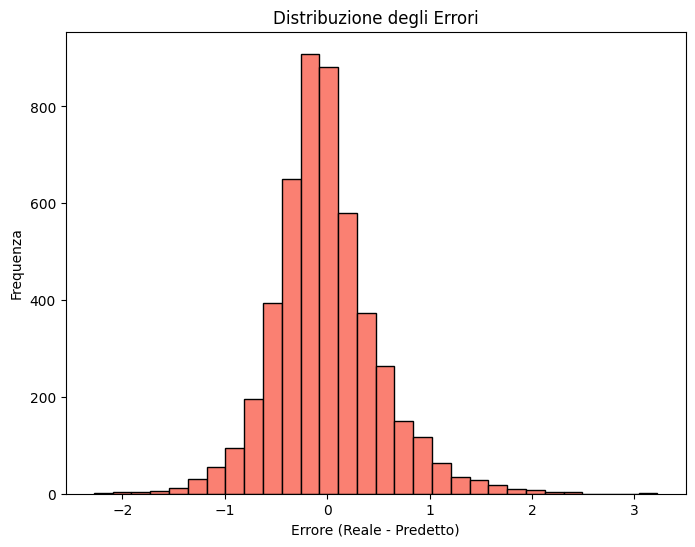

In [185]:
errors = y_test - predictions

plt.figure(figsize=(8,6))
plt.hist(errors, bins=30, color="salmon", edgecolor="black")
plt.xlabel("Errore (Reale - Predetto)")
plt.ylabel("Frequenza")
plt.title("Distribuzione degli Errori")
plt.show()

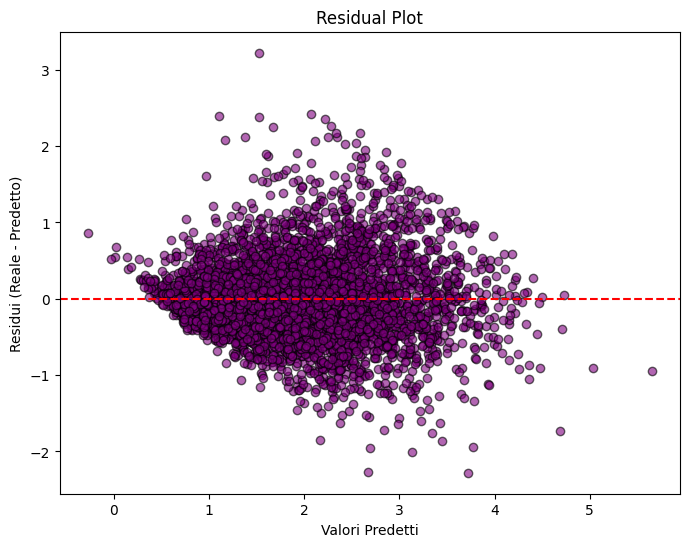

In [186]:
plt.figure(figsize=(8,6))
plt.scatter(predictions, errors, alpha=0.6, color="purple", edgecolor="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valori Predetti")
plt.ylabel("Residui (Reale - Predetto)")
plt.title("Residual Plot")
plt.show()
